### Data Background

This project will be leveraging tweets from the twitter account (WeRateDogs) where users give dog ratings based on humourous comment about diverse dogs. It is noteworthy that WeRateDogs downloaded their tweets at some point in 2017 which is not up to date today, hence the need for scrapping data from diverse source for wrangling, analysis and visualization.

### The Data

In this project, you will work on the following three datasets.

**Enhanced Twitter Archive**

> The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

**Image Predictions File**

> One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

**Additional Data via the Twitter API**

> Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.



### Table of Content [TOC]

- [Gathering](#Gathering)
- [Assessing](#Assessing)
- [Observations](#Observations)
- [Cleaning](#Cleaning)
- [Visualizations](#Visualization)

### Importing Libaries

In [1]:
#Import Numpy
import numpy as np

#Import Pandas
import pandas as pd

#Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import Seaborn
import seaborn as sns
sns.set_theme()

# Importing Request handler
import requests


#Import Warning for ignoring unneccessary warnings
import warnings
warnings.filterwarnings("ignore")

# Gathering

**Loading Enhanced Twitter Archive**

In [2]:
df_archived = pd.read_csv('twitter-archive-enhancedcsv.csv')

In [3]:
df_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_archived.shape

(2356, 17)

In [5]:
df_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Image Prediction File Extraction Using the Request Library**

In [6]:
address = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

r = requests.get(address)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)

In [7]:
Image_pred = pd.read_table('image-predictions.tsv')

In [8]:
Image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
Image_pred.shape

(2075, 12)

**Additional Data via Twitter API**

In [10]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [11]:
consumer_key = 'Erased before submission'
consumer_secret = 'Erased before submission'
access_token = 'Erased before submission'
access_secret = 'Erased before submission'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)
tweet_ids = df_archived.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count+=1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet =api.get_status(tweet_id, tweet_mode = 'extended')
            print('success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
success
2: 892177421306343426
success
3: 891815181378084864
success
4: 891689557279858688
success
5: 891327558926688256
success
6: 891087950875897856
success
7: 890971913173991426
success
8: 890729181411237888
success
9: 890609185150312448
success
10: 890240255349198849
success
11: 890006608113172480
success
12: 889880896479866881
success
13: 889665388333682689
success
14: 889638837579907072
success
15: 889531135344209921
success
16: 889278841981685760
success
17: 888917238123831296
success
18: 888804989199671297
success
19: 888554962724278272
success
20: 888202515573088257
Fail
21: 888078434458587136
success
22: 887705289381826560
success
23: 887517139158093824
success
24: 887473957103951883
success
25: 887343217045368832
success
26: 887101392804085760
success
27: 886983233522544640
success
28: 886736880519319552
success
29: 886680336477933568
success
30: 886366144734445568
success
31: 886267009285017600
success
32: 886258384151887873
success
33: 8860541600590725

Fail
262: 842846295480000512
success
263: 842765311967449089
success
264: 842535590457499648
success
265: 842163532590374912
success
266: 842115215311396866
success
267: 841833993020538882
success
268: 841680585030541313
success
269: 841439858740625411
success
270: 841320156043304961
success
271: 841314665196081154
success
272: 841077006473256960
success
273: 840761248237133825
success
274: 840728873075638272
success
275: 840698636975636481
success
276: 840696689258311684
success
277: 840632337062862849
success
278: 840370681858686976
success
279: 840268004936019968
success
280: 839990271299457024
success
281: 839549326359670784
success
282: 839290600511926273
success
283: 839239871831150596
success
284: 838952994649550848
success
285: 838921590096166913
success
286: 838916489579200512
success
287: 838831947270979586
success
288: 838561493054533637
success
289: 838476387338051585
success
290: 838201503651401729
success
291: 838150277551247360
success
292: 838085839343206401
success
293

success
520: 810284430598270976
success
521: 810254108431155201
success
522: 809920764300447744
success
523: 809808892968534016
success
524: 809448704142938112
success
525: 809220051211603969
success
526: 809084759137812480
success
527: 808838249661788160
success
528: 808733504066486276
success
529: 808501579447930884
success
530: 808344865868283904
success
531: 808134635716833280
success
532: 808106460588765185
success
533: 808001312164028416
success
534: 807621403335917568
success
535: 807106840509214720
success
536: 807059379405148160
success
537: 807010152071229440
success
538: 806629075125202948
success
539: 806620845233815552
success
540: 806576416489959424
success
541: 806542213899489280
success
542: 806242860592926720
success
543: 806219024703037440
success
544: 805958939288408065
success
545: 805932879469572096
success
546: 805826884734976000
success
547: 805823200554876929
success
548: 805520635690676224
success
549: 805487436403003392
success
550: 805207613751304193
success


success
777: 776113305656188928
success
778: 776088319444877312
success
779: 775898661951791106
success
780: 775842724423557120
success
781: 775733305207554048
success
782: 775729183532220416
success
783: 775364825476165632
success
784: 775350846108426240
success
785: 775096608509886464
Fail
786: 775085132600442880
success
787: 774757898236878852
success
788: 774639387460112384
success
789: 774314403806253056
success
790: 773985732834758656
success
791: 773922284943896577
success
792: 773704687002451968
success
793: 773670353721753600
success
794: 773547596996571136
success
795: 773336787167145985
success
796: 773308824254029826
success
797: 773247561583001600
success
798: 773191612633579521
success
799: 772877495989305348
success
800: 772826264096874500
success
801: 772615324260794368
success
802: 772581559778025472
success
803: 772193107915964416
success
804: 772152991789019136
success
805: 772117678702071809
success
806: 772114945936949249
success
807: 772102971039580160
success
808

Rate limit reached. Sleeping for: 572


success
901: 758740312047005698
success
902: 758474966123810816
success
903: 758467244762497024
success
904: 758405701903519748
success
905: 758355060040593408
success
906: 758099635764359168
success
907: 758041019896193024
success
908: 757741869644341248
success
909: 757729163776290825
success
910: 757725642876129280
success
911: 757611664640446465
success
912: 757597904299253760
success
913: 757596066325864448
success
914: 757400162377592832
success
915: 757393109802180609
success
916: 757354760399941633
success
917: 756998049151549440
success
918: 756939218950160384
success
919: 756651752796094464
success
920: 756526248105566208
success
921: 756303284449767430
success
922: 756288534030475264
success
923: 756275833623502848
success
924: 755955933503782912
success
925: 755206590534418437
success
926: 755110668769038337
success
927: 754874841593970688
success
928: 754856583969079297
success
929: 754747087846248448
success
930: 754482103782404096
success
931: 754449512966619136
success


success
1154: 725729321944506368
success
1155: 725458796924002305
success
1156: 724983749226668032
success
1157: 724771698126512129
success
1158: 724405726123311104
success
1159: 724049859469295616
success
1160: 724046343203856385
success
1161: 724004602748780546
success
1162: 723912936180330496
success
1163: 723688335806480385
success
1164: 723673163800948736
success
1165: 723179728551723008
success
1166: 722974582966214656
success
1167: 722613351520608256
success
1168: 721503162398597120
success
1169: 721001180231503872
success
1170: 720785406564900865
success
1171: 720775346191278080
success
1172: 720415127506415616
success
1173: 720389942216527872
success
1174: 720340705894408192
success
1175: 720059472081784833
success
1176: 720043174954147842
success
1177: 719991154352222208
success
1178: 719704490224398336
success
1179: 719551379208073216
success
1180: 719367763014393856
success
1181: 719339463458033665
success
1182: 719332531645071360
success
1183: 718971898235854848
success
11

success
1404: 699413908797464576
success
1405: 699370870310113280
success
1406: 699323444782047232
success
1407: 699088579889332224
success
1408: 699079609774645248
success
1409: 699072405256409088
success
1410: 699060279947165696
success
1411: 699036661657767936
success
1412: 698989035503689728
success
1413: 698953797952008193
success
1414: 698907974262222848
success
1415: 698710712454139905
success
1416: 698703483621523456
success
1417: 698635131305795584
success
1418: 698549713696649216
success
1419: 698355670425473025
success
1420: 698342080612007937
success
1421: 698262614669991936
success
1422: 698195409219559425
success
1423: 698178924120031232
success
1424: 697995514407682048
success
1425: 697990423684476929
success
1426: 697943111201378304
success
1427: 697881462549430272
success
1428: 697630435728322560
success
1429: 697616773278015490
success
1430: 697596423848730625
success
1431: 697575480820686848
success
1432: 697516214579523584
success
1433: 697482927769255936
success
14

success
1653: 683481228088049664
success
1654: 683462770029932544
success
1655: 683449695444799489
success
1656: 683391852557561860
success
1657: 683357973142474752
success
1658: 683142553609318400
success
1659: 683111407806746624
success
1660: 683098815881154561
success
1661: 683078886620553216
success
1662: 683030066213818368
success
1663: 682962037429899265
success
1664: 682808988178739200
success
1665: 682788441537560576
success
1666: 682750546109968385
success
1667: 682697186228989953
success
1668: 682662431982772225
success
1669: 682638830361513985
success
1670: 682429480204398592
success
1671: 682406705142087680
success
1672: 682393905736888321
success
1673: 682389078323662849
success
1674: 682303737705140231
success
1675: 682259524040966145
success
1676: 682242692827447297
success
1677: 682088079302213632
success
1678: 682059653698686977
success
1679: 682047327939461121
success
1680: 682032003584274432
success
1681: 682003177596559360
success
1682: 681981167097122816
success
16

Rate limit reached. Sleeping for: 575


success
1802: 676957860086095872
success
1803: 676949632774234114
success
1804: 676948236477857792
success
1805: 676946864479084545
success
1806: 676942428000112642
success
1807: 676936541936185344
success
1808: 676916996760600576
success
1809: 676897532954456065
success
1810: 676864501615042560
success
1811: 676821958043033607
success
1812: 676819651066732545
success
1813: 676811746707918848
success
1814: 676776431406465024
success
1815: 676617503762681856
success
1816: 676613908052996102
success
1817: 676606785097199616
success
1818: 676603393314578432
success
1819: 676593408224403456
success
1820: 676590572941893632
success
1821: 676588346097852417
success
1822: 676582956622721024
success
1823: 676575501977128964
success
1824: 676533798876651520
success
1825: 676496375194980353
success
1826: 676470639084101634
success
1827: 676440007570247681
success
1828: 676430933382295552
success
1829: 676263575653122048
success
1830: 676237365392908289
success
1831: 676219687039057920
success
18

success
2051: 671497587707535361
success
2052: 671488513339211776
success
2053: 671486386088865792
success
2054: 671485057807351808
success
2055: 671390180817915904
success
2056: 671362598324076544
success
2057: 671357843010908160
success
2058: 671355857343524864
success
2059: 671347597085433856
success
2060: 671186162933985280
success
2061: 671182547775299584
success
2062: 671166507850801152
success
2063: 671163268581498880
success
2064: 671159727754231808
success
2065: 671154572044468225
success
2066: 671151324042559489
success
2067: 671147085991960577
success
2068: 671141549288370177
success
2069: 671138694582165504
success
2070: 671134062904504320
success
2071: 671122204919246848
success
2072: 671115716440031232
success
2073: 671109016219725825
success
2074: 670995969505435648
success
2075: 670842764863651840
success
2076: 670840546554966016
success
2077: 670838202509447168
success
2078: 670833812859932673
success
2079: 670832455012716544
success
2080: 670826280409919488
success
20

success
2300: 667065535570550784
success
2301: 667062181243039745
success
2302: 667044094246576128
success
2303: 667012601033924608
success
2304: 666996132027977728
success
2305: 666983947667116034
success
2306: 666837028449972224
success
2307: 666835007768551424
success
2308: 666826780179869698
success
2309: 666817836334096384
success
2310: 666804364988780544
success
2311: 666786068205871104
success
2312: 666781792255496192
success
2313: 666776908487630848
success
2314: 666739327293083650
success
2315: 666701168228331520
success
2316: 666691418707132416
success
2317: 666649482315059201
success
2318: 666644823164719104
success
2319: 666454714377183233
success
2320: 666447344410484738
success
2321: 666437273139982337
success
2322: 666435652385423360
success
2323: 666430724426358785
success
2324: 666428276349472768
success
2325: 666421158376562688
success
2326: 666418789513326592
success
2327: 666411507551481857
success
2328: 666407126856765440
success
2329: 666396247373291520
success
23

In [11]:
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [12]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [13]:
tweet_data = pd.DataFrame(df_list)

In [14]:
tweet_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [15]:
tweet_data.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [16]:
tweet_data.to_csv('tweet_data.csv', index = False)

In [17]:
df_tweet_data = pd.read_csv('tweet_data.csv')

In [18]:
df_tweet_data.shape

(2327, 32)

In [19]:
df_tweet_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


# Assessing
> Assessing visually in Ms. Excel and Programatically using the pandas Library

**Assessing Enhanced Twitter Archive**

In [20]:
df_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [21]:
df_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
## Using the describe function will apply to rating numerator and denominator as all other float features are not really integers

df_archived[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [23]:
df_archived.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [24]:
df_archived.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [25]:
df_archived.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [26]:
df_archived.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [27]:
df_archived.puppo.value_counts() 

None     2326
puppo      30
Name: puppo, dtype: int64

**Assessing Image Prediction Dataset**

In [28]:
Image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [29]:
Image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
Image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [31]:
Image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [32]:
Image_pred.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

**Assessing Twitter API Dataset**

In [33]:
df_tweet_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2323,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2324,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2325,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [34]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2327 non-null   object 
 1   id                             2327 non-null   int64  
 2   id_str                         2327 non-null   int64  
 3   full_text                      2327 non-null   object 
 4   truncated                      2327 non-null   bool   
 5   display_text_range             2327 non-null   object 
 6   entities                       2327 non-null   object 
 7   extended_entities              2057 non-null   object 
 8   source                         2327 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     float64
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     f

# Observations

**Quality**

1. `timestamp` datatype  is `object` instead of `datetime` (invalid datatype)
2. Columns (`doggo`, `floofer`, `pupper`, `puppo`) has `None` for missing values.
3. `source` column is html tag `<a>` we can extract the source of the tweet and covert it to categorical.
4. `text` column has the link for the tweets and ratings at the end, so we can remove it. 
###### We are interested in the tweet ONLY not the retweet there for we should remove those from the table.
###### We are interested in the tweet ONLY not the reply to the original tweet there for we should remove those from the table.

5. `name` column have None instead of NaN and too many unvalid values.
6. `id` column in df_tweet_data name different than the other 2 data sets. (instead of "tweet_id")
7. Invalid datatype for `tweet_id`(integer instead of string)
8. `expanded_urls` column has NaN values

**Tidiness**

1. There is some kind of relation between the dataset but are divided into three without much uniformity
2. The dog growth stages is divided into 4 different features (`doggo`, `floofer`, `pupper`, `puppo`)
3. Just 3 columns needed `id`, `retweet_count`, `favorite_count` from the twitter dataset
4. All datasets should be combined into 1 dataset only

# Cleaning

**Create each dataset copy**

In [35]:
df_archived_clean = df_archived.copy()
Image_pred_clean = Image_pred.copy()
df_tweet_data_clean = df_tweet_data.copy()

In [36]:
df_archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Define**

Remove retweets and replies.

**Code**

In [37]:
df_archived_clean = df_archived_clean[df_archived_clean.in_reply_to_status_id.isnull()]
df_archived_clean = df_archived_clean[df_archived_clean.in_reply_to_user_id.isnull()]
df_archived_clean = df_archived_clean[df_archived_clean.retweeted_status_id.isnull()]
df_archived_clean = df_archived_clean[df_archived_clean.retweeted_status_user_id.isnull()]

# drop columns
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archived_clean.drop(columns = cols, axis=1, inplace=True)

**Test**

In [38]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


**Define**

Chnage `timestamp` datatype from `object` to `datetime`


**Code**

In [39]:
df_archived_clean.timestamp = pd.to_datetime(df_archived_clean.timestamp)

**Test**

In [40]:
df_archived_clean.timestamp.dtype

datetime64[ns, UTC]

**Define**

Replace 'None' with `np.nan` for Columns (`doggo`, `floofer`, `pupper`, `puppo`).

**Code**

In [41]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']

for col in columns:
    df_archived_clean[col] = df_archived_clean[col].replace('None', np.nan)

**Test**

In [42]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3

In [43]:
df_archived_clean.doggo.value_counts()

doggo    83
Name: doggo, dtype: int64

**Define**

Extract specific tweet source from `source` column using `apply` lambda function in pandas and convert it to a categorical feature


**Code**

In [44]:
# check for the unique values
df_archived_clean.source.unique()

#make a function fix_source which extract the strings between tags
def fix_source(x):
    'x is an html string from the source column in df_archived_clean dataset'
    #find the first closed  tag >
    i= x.find('>') + 1
    # find the first open tag after the previous <
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]

df_archived_clean.source = df_archived_clean.source.apply(lambda x: fix_source(x)).astype('category')

**Test**

In [45]:
df_archived_clean.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

**Define**

Remove ratings and links from `text` column using `RegEx`.

**Code**

In [46]:
df_archived_clean.text = df_archived_clean.text.str.extract('(.+(?=\s\d+/\d+\s))')

**Test**

In [47]:
df_archived_clean.text.sample(10)

929     This is Milo. He's currently plotting his reve...
1124    This is Ziva. She doesn't know how her collar ...
2264    This is a southwest Coriander named Klint. Hat...
1081    This is Charles. He's a Nova Scotian Towel Pou...
2065                     *struggling to breathe properly*
2178    Super rare dog right here guys. Doesn't bark. ...
645     This is Benji. He's Air Bud. It's a low effort...
305     This is Lucy. She spent all morning overseeing...
370     This is Mutt Ryan. He's quite confident at the...
2294    Extremely intelligent dog here. Has learned to...
Name: text, dtype: object

**Define**

Remove unnecessary columns for df_api_cleand

**Code**

In [48]:
df_tweet_data_clean.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [49]:
df_tweet_data_clean = df_tweet_data_clean[['id', 'retweet_count', 'favorite_count']]

**Test**

In [50]:
df_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


**Define**

Rename `id` column in df_api_cleand to `tweet_id`

**Code**

In [51]:
df_tweet_data_clean.columns = ['tweet_id', 'retweet_count', 'favorite_count']

**Test**

In [52]:
df_tweet_data_clean.columns 

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

**Define**

- Replace 'None' with np.nan in df_archived `name` column.
- Remove any rows with invalid names which starts with lower laters.

**Code**

In [53]:
df_archived_clean[~df_archived_clean.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [54]:
df_archived_clean.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

**Test**

In [55]:
df_archived_clean.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: name, Length: 929, dtype: int64

**Define**

create `dog_growth_stage` column and apppend the (`doggo`, `floofer`, `pupper`, `puppo`) columns into one

In [56]:
 # select the dog stages columns from the dataset
columns = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
df_archived_clean['dog_growth_stage'] = df_archived_clean[columns].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
df_archived_clean.dog_growth_stage = df_archived_clean.dog_growth_stage.replace('', np.nan).astype('category')

# drop the 4 columns
df_archived_clean = df_archived_clean.drop(columns = columns, axis =1)

**Test**

In [57]:
df_archived_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_growth_stage'],
      dtype='object')

In [58]:
df_archived_clean.dog_growth_stage.value_counts()

pupper            221
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_growth_stage, dtype: int64

**Define**

merge all dataset into database

**Code**

In [59]:
df_combined = pd.merge(df_archived_clean, Image_pred_clean, on='tweet_id')
df_combined = pd.merge(df_combined, df_tweet_data_clean, on = 'tweet_id')

In [60]:
df_combined.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_growth_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7000,33802
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5298,29314
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3477,22042
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7221,36918
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7753,35297


In [61]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   category           
 3   text                1898 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   int64              
 6   rating_denominator  1963 non-null   int64              
 7   name                1342 non-null   object             
 8   dog_growth_stage    302 non-null    category           
 9   jpg_url             1963 non-null   object             
 10  img_num             1963 non-null   int64              
 11  p1                  1963 non-null   object             
 12  p1_conf             1963 non-null 

### Storing

In [62]:
df_combined.to_csv('twitter_archive_master.csv', index = False)

# Visualization

In [63]:
import seaborn as sns; 
sns.set_style("darkgrid")

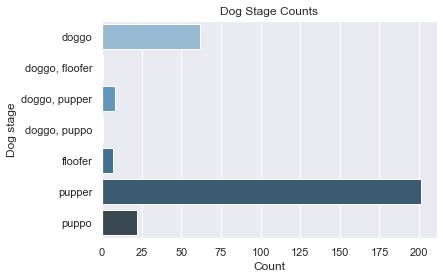

<Figure size 432x288 with 0 Axes>

In [64]:
data = df_combined.groupby('dog_growth_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Dog stage', title='Dog Stage Counts')
plt.show()
plt.savefig('dog_stage.png')

**Inference**
> Pupper has the highest represention in a single dog state

> Floofer has the the lowest representation in a single dog state

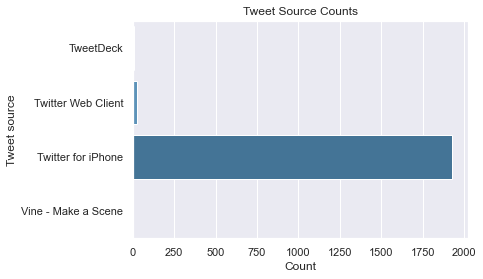

<Figure size 432x288 with 0 Axes>

In [65]:
data = df_combined.groupby('source').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Tweet source', title='Tweet Source Counts')
plt.show()
plt.savefig('tweet_source.png')

**Inference**

> Larger portion of tweets on the page were from an Iphone users

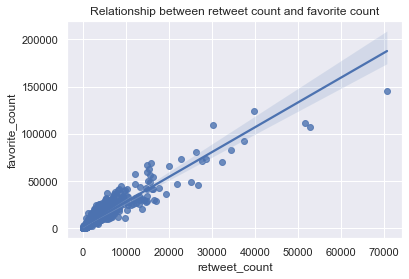

In [68]:
plt.title('Relationship between retweet count and favorite count')
ax = sns.regplot(x="retweet_count", y="favorite_count", data=df_combined)

**Inference**

> There is a strong linear relationship between both parameters